## Predicting Survival on the Titanic

### History
Perhaps one of the most infamous shipwrecks in history, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 people on board. Interestingly, by analysing the probability of survival based on few attributes like gender, age, and social status, we can make very accurate predictions on which passengers would survive. Some groups of people were more likely to survive than others, such as women, children, and the upper-class. Therefore, we can learn about the society priorities and privileges at the time.

### Assignment:

Build a Machine Learning Pipeline, to engineer the features in the data set and predict who is more likely to Survive the catastrophe.

Follow the Jupyter notebook below, and complete the missing bits of code, to achieve each one of the pipeline steps.

In [302]:
import re

# to handle datasets
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import StandardScaler

# to build the models
from sklearn.linear_model import LogisticRegression

# to evaluate the models
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix


# to persist the model and the scaler
import joblib

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_rows', 50)

## Prepare the data set

In [259]:
# load the data - it is available open source and online

data = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')

# display data
data.head()

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

      age  sibsp  parch  ticket      fare    cabin embarked boat body  \
0      29      0      0   24160  211.3375       B5        S    2    ?   
1  0.9167      1      2  113781    151.55  C22 C26        S   11    ?   
2       2      1      2  113781    151.55  C22 C26        S    ?    ?   
3      30      1      2  113781    151.55  C22 C26        S    ?  135   
4      25      1      2  113781    151.55  C22 C26        S    ?    ?   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

In [260]:
# replace interrogation marks by NaN values

data = data.replace('?', np.nan)

In [261]:
# retain only the first cabin if more than
# 1 are available per passenger

def get_first_cabin(row):
    try:
        return row.split()[0]
    except:
        return np.nan
    
data['cabin'] = data['cabin'].apply(get_first_cabin)
data.cabin

0        B5
1       C22
2       C22
3       C22
4       C22
       ... 
1304    NaN
1305    NaN
1306    NaN
1307    NaN
1308    NaN
Name: cabin, Length: 1309, dtype: object

In [262]:
# extracts the title (Mr, Ms, etc) from the name variable

def get_title(passenger):
    line = passenger
    if re.search('Mrs', line):
        return 'Mrs'
    elif re.search('Mr', line):
        return 'Mr'
    elif re.search('Miss', line):
        return 'Miss'
    elif re.search('Master', line):
        return 'Master'
    else:
        return 'Other'
    
data['title'] = data['name'].apply(get_title)

In [263]:
# cast numerical variables as floats

data['fare'] = data['fare'].astype('float')
data['age'] = data['age'].astype('float')

In [264]:
# drop unnecessary variables

data.drop(labels=['name','ticket', 'boat', 'body','home.dest'], axis=1, inplace=True)

# display data
data.head()

pclass  survived     sex      age  sibsp  parch      fare cabin embarked  \
0       1         1  female  29.0000      0      0  211.3375    B5        S   
1       1         1    male   0.9167      1      2  151.5500   C22        S   
2       1         0  female   2.0000      1      2  151.5500   C22        S   
3       1         0    male  30.0000      1      2  151.5500   C22        S   
4       1         0  female  25.0000      1      2  151.5500   C22        S   

    title  
0    Miss  
1  Master  
2    Miss  
3      Mr  
4     Mrs

In [265]:
# save the data set

data.to_csv('titanic.csv', index=False)

## Data Exploration

### Find numerical and categorical variables

In [266]:
target = 'survived'

In [267]:
vars_num = [var for var in data.columns if data[var].dtype != 'O']

vars_cat = [var for var in data.columns if data[var].dtype == 'O']

print('Number of numerical variables: {}'.format(len(vars_num)))
print('Number of categorical variables: {}'.format(len(vars_cat)))

Number of numerical variables: 6
Number of categorical variables: 4


### Find missing values in variables

In [268]:
# first in numerical variables
# loop through each variable and count the m=number of missing variables and divide that by the length of the columns
for var in vars_num:
    pct = np.round((data[var].isnull().sum() / len(data)) * 100, 2)
    print(f'{pct}% of the values in {var} are missing')


0.0% of the values in pclass are missing
0.0% of the values in survived are missing
20.09% of the values in age are missing
0.0% of the values in sibsp are missing
0.0% of the values in parch are missing
0.08% of the values in fare are missing


In [269]:
# now in categorical variables
for var in vars_cat:
    pct = np.round((data[var].isnull().sum() / len(data)) * 100, 2)
    print(f'{pct}% of the values in {var} are missing')


0.0% of the values in sex are missing
77.46% of the values in cabin are missing
0.15% of the values in embarked are missing
0.0% of the values in title are missing


### Determine cardinality of categorical variables
The number of uniques variables for a categorical feature

In [270]:
for var in vars_cat:
    if len(data[var].unique()) > 50:
        print(f'{var} has a high cardinality of {len(data[var].unique())} categories')
    else:
        print(f'{var} has {len(data[var].unique())} categories')

sex has 2 categories
cabin has a high cardinality of 182 categories
embarked has 4 categories
title has 5 categories


### Determine the distribution of numerical variables
What I wanna do here is make a histogram that will show the distribution of the numeric variables for each numeric variable


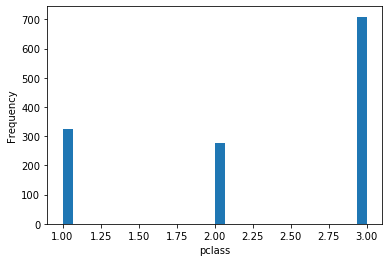

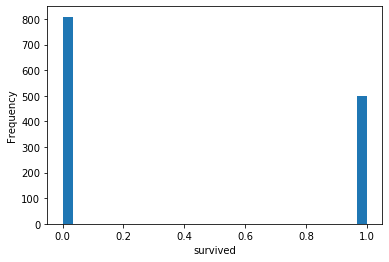

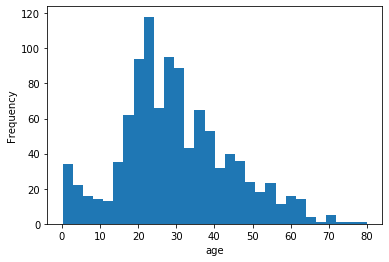

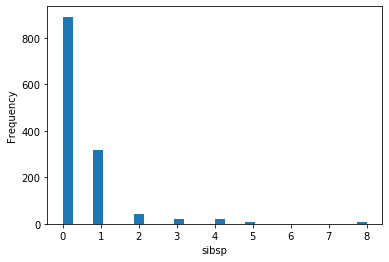

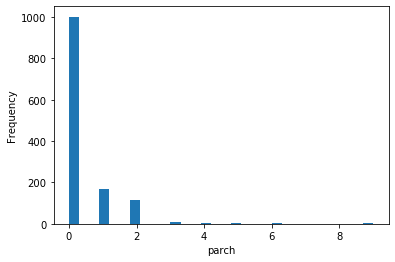

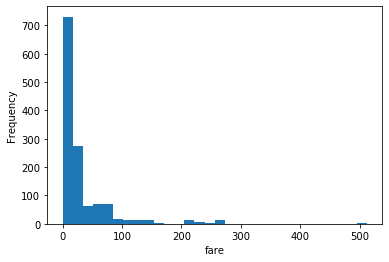

In [271]:
for var in vars_num:
    
    plt.hist(data[var],bins = 30)
    plt.ylabel('Frequency')
    plt.xlabel(var)
    plt.show()

## Separate data into train and test

Use the code below for reproducibility. Don't change it.

## Feature Engineering

### Extract only the letter (and drop the number) from the variable Cabin

In [272]:
data['cabin'].value_counts()
# from this I can see that only the first character in the string is a letter and the rest are numbers so I can just get
# the first character in the string

# cast to string and make uppercase
data['cabin'] = data['cabin'].apply(lambda x: str(x)[0].upper())





### Fill in Missing data in numerical variables:

- Add a binary missing indicator
- Fill NA in original variable with the median

In [273]:
data.isnull().sum()

pclass        0
survived      0
sex           0
age         263
sibsp         0
parch         0
fare          1
cabin         0
embarked      2
title         0
dtype: int64

In [274]:
#fill na
for col in data.columns:
    # fill the columns that have null values with the median
    if data[col].isnull().sum() > 0 :
        try: # if theres an error, its probably cause its a categorical variable
            data[col].fillna(data[col].median(), inplace = True)
        except: #if thats the case just use fowrad fill
            data[col].fillna('missing', inplace = True)

### Replace Missing data in categorical variables with the string **Missing**

### Remove rare labels in categorical variables

- remove labels present in less than 5 % of the passengers

In [276]:
for var in data.columns:
    if data[var].dtype == "O":
        rare = data.groupby(var)[var].count() / len(X_test) * 100
        # returns a list of the variables that appear More than 3% of the time
        infrequent = rare[rare> .03 * 100].index.values
        # find the infrequnt labels and replace them with nan values 
        data[var] = np.where(data[var].isin(infrequent),data[var],'rare')

In [277]:
data

pclass  survived     sex      age  sibsp  parch      fare cabin  \
0          1         1  female  29.0000      0      0  211.3375     B   
1          1         1    male   0.9167      1      2  151.5500     C   
2          1         0  female   2.0000      1      2  151.5500     C   
3          1         0    male  30.0000      1      2  151.5500     C   
4          1         0  female  25.0000      1      2  151.5500     C   
...      ...       ...     ...      ...    ...    ...       ...   ...   
1304       3         0  female  14.5000      1      0   14.4542     N   
1305       3         0  female  28.0000      1      0   14.4542     N   
1306       3         0    male  26.5000      0      0    7.2250     N   
1307       3         0    male  27.0000      0      0    7.2250     N   
1308       3         0    male  29.0000      0      0    7.8750     N   

     embarked   title  
0           S    Miss  
1           S  Master  
2           S    Miss  
3           S      Mr  
4           S     Mrs  
...       ...     ...  
1304        C    Miss  
1305        C    Miss  
1306        C      Mr  
1307        C      Mr  
1308        S      Mr  

[1309 rows x 10 columns]

### Perform one hot encoding of categorical variables into k-1 binary variables

- k-1, means that if the variable contains 9 different categories, we create 8 different binary variables
- Remember to drop the original categorical variable (the one with the strings) after the encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [280]:
data = pd.get_dummies(data)

### Scale the variables

- Use the standard scaler from Scikit-learn

In [281]:
scaler = StandardScaler()

In [282]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('survived', axis=1),  # predictors
    data['survived'],  # target
    test_size=0.2,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((1047, 24), (262, 24))

In [283]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Train the Logistic Regression model

- Set the regularization parameter to 0.0005
- Set the seed to 0

In [284]:
model = LogisticRegression(random_state = 0)

In [285]:
model.fit(X_train, y_train)

C:\Users\gabe5\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Make predictions and evaluate model performance

Determine:
- roc-auc
- accuracy

**Important, remember that to determine the accuracy, you need the outcome 0, 1, referring to survived or not. But to determine the roc-auc you need the probability of survival.**

In [286]:
pred = model.predict(X_test)

In [291]:
accuracy_score(y_test, pred)

0.7977099236641222

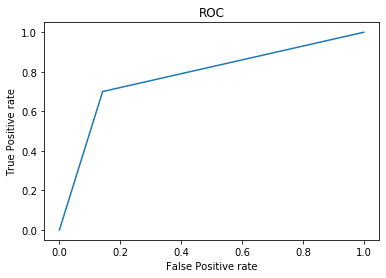

In [301]:
# ROC Curve
auc = roc_auc_score(y_test, pred)
fpr, tpr, thresh = roc_curve(y_test, pred)

plt.plot(fpr, tpr, label =f'Logistic Regression (auc = {roc})')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC')
plt.show()

Text(33.0, 0.5, 'Actual')

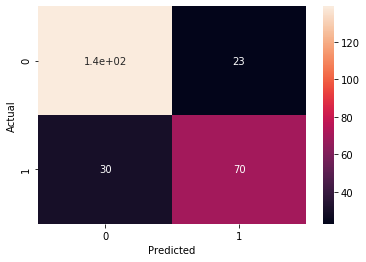

In [306]:
import seaborn as sns
cm = confusion_matrix(y_test, pred)

ax = plt.subplot()

sns.heatmap(cm, annot = True)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

That's it! Well done

**Keep this code safe, as we will use this notebook later on, to build production code, in our next assignement!!**